In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 98% !important }<style>"))

# Analysis

In [2]:
from utilities import *
from models import *

In [3]:
import joblib

In [4]:
ble = read_ble("../Data/ble.csv")

In [5]:
pin_file = "../Data/pin.csv"

pin = read_pin(pin_file)

In [6]:
testPin_file = "../Data/testPin.csv"

testPin = read_pin(testPin_file)

In [7]:
filename = "../Data/rssi5.csv"
B1 = "0117C55D14E4"

data = read_data(filename, B1)

All beacons: ['0117C55D14E4']
Selecting 0117C55D14E4


In [8]:
data[scanners] = min_max_scaling(data[scanners])

In [9]:
testFilename = "../Data/testRssi.csv"
B1 = "0117C55D14E4"

test = read_data(testFilename, B1)

All beacons: ['0117C55D14E4']
Selecting 0117C55D14E4


In [10]:
test[scanners] = min_max_scaling(test[scanners])

## Train Validation Split

In [11]:
train, validation = train_validation_split(data)

In [12]:
train.groupby("location")[scanners].count()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
location,,,,,,,,,,,,,,,,,
V1_10,281,151,102,258,232,95,98,339,0,213,123,161,257,382,193,4,284
V1_11,62,84,102,125,149,104,83,122,153,62,72,174,161,43,52,27,107
V1_12,91,100,71,123,104,105,72,72,207,63,91,199,156,107,139,75,89
V1_13,88,176,65,146,57,115,136,146,324,18,53,144,117,128,190,20,80
V1_14,43,200,63,107,77,117,342,84,266,19,137,63,104,127,224,91,116
V1_18,81,30,61,113,59,45,35,292,3,93,49,75,71,298,36,0,209
V1_19,381,123,114,195,316,107,75,403,51,178,62,185,332,390,142,117,281
V1_20,139,140,124,102,152,112,85,104,108,46,84,116,223,19,110,28,93
V1_21,88,183,100,98,126,118,162,68,187,28,120,122,110,80,119,89,82


In [13]:
train.shape

(39730, 19)

In [14]:
validation.shape

(9933, 19)

In [15]:
train.sort_values("time", inplace=True)
validation.sort_values("time", inplace=True)
test.sort_values("time", inplace=True)

In [16]:
train_rolled = train.groupby("location").rolling(30, min_periods=1).mean().reset_index()
validation_rolled = validation.groupby("location").rolling(30, min_periods=1).mean().reset_index()
test_rolled = test.groupby("location").rolling(30, min_periods=1).mean().reset_index()

In [17]:
train_rolled

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,30171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
1,V1_10,30172,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
2,V1_10,30173,0.533333,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
3,V1_10,30176,0.533333,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,0.583333,NaN,NaN,NaN,0.450000
4,V1_10,30177,0.533333,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,0.575000,NaN,NaN,NaN,0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39725,V1_9,43166,0.433333,NaN,0.366667,0.606667,0.483333,NaN,NaN,0.622222,NaN,0.183333,0.183333,0.558333,0.400000,0.475,0.4,0.133333,0.416667
39726,V1_9,43167,0.433333,NaN,0.366667,0.606667,0.483333,NaN,NaN,0.622222,NaN,0.183333,0.183333,0.558333,0.400000,0.475,0.4,0.125000,0.416667
39727,V1_9,43168,0.433333,NaN,0.366667,0.606667,0.483333,NaN,NaN,0.622222,NaN,0.183333,0.183333,0.558333,0.422222,0.475,0.4,0.125000,0.416667
39728,V1_9,43169,0.433333,NaN,0.366667,0.606667,0.483333,NaN,NaN,0.620833,NaN,0.183333,0.183333,0.558333,0.422222,0.475,0.4,0.125000,0.416667


## Change Location to Coordinates

In [18]:
train_rolled["X"] = train_rolled["location"].apply(lambda x: pin[x]["X"])
train_rolled["Y"] = train_rolled["location"].apply(lambda x: pin[x]["Y"])

In [19]:
validation_rolled["X"] = validation_rolled["location"].apply(lambda x: pin[x]["X"])
validation_rolled["Y"] = validation_rolled["location"].apply(lambda x: pin[x]["Y"])

In [20]:
test_rolled["X"] = test_rolled["location"].apply(lambda x: testPin[x]["X"])
test_rolled["Y"] = test_rolled["location"].apply(lambda x: testPin[x]["Y"])

In [21]:
def reg_impute(data):
    for s in scanners:
        dx = data['X'] - ble[s]['X']
        dy = data['Y'] - ble[s]['Y']
        d = np.sqrt(np.square(dy) + np.square(dx))
        reg = joblib.load('../Models/linear_distance_models/{}.joblib'.format(s))
        ss = pd.Series(reg.predict(d.values.reshape((-1, 1))))
        data[s].fillna(ss, inplace=True)

In [22]:
reg_impute(train_rolled)
reg_impute(validation_rolled)
reg_impute(test_rolled)

In [23]:
train_rolled

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,...,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C,X,Y
0,V1_10,30171,0.411347,0.353837,0.305977,0.535450,0.433431,0.269984,0.265770,0.449929,...,0.306017,0.183333,0.491754,0.533585,0.365368,0.347862,0.083012,0.418071,11.17660,5.29753
1,V1_10,30172,0.411347,0.353837,0.305977,0.535450,0.433431,0.269984,0.300000,0.449929,...,0.306017,0.183333,0.491754,0.533585,0.365368,0.347862,0.083012,0.418071,11.17660,5.29753
2,V1_10,30173,0.533333,0.353837,0.305977,0.535450,0.433431,0.269984,0.300000,0.449929,...,0.306017,0.183333,0.491754,0.533585,0.365368,0.347862,0.083012,0.418071,11.17660,5.29753
3,V1_10,30176,0.533333,0.353837,0.305977,0.535450,0.433431,0.269984,0.300000,0.449929,...,0.306017,0.183333,0.491754,0.583333,0.365368,0.347862,0.083012,0.450000,11.17660,5.29753
4,V1_10,30177,0.533333,0.353837,0.305977,0.535450,0.433431,0.269984,0.300000,0.449929,...,0.306017,0.183333,0.491754,0.575000,0.365368,0.347862,0.083012,0.450000,11.17660,5.29753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39725,V1_9,43166,0.433333,0.280835,0.366667,0.606667,0.483333,0.206379,0.212461,0.622222,...,0.183333,0.183333,0.558333,0.400000,0.475000,0.400000,0.133333,0.416667,8.17867,5.28213
39726,V1_9,43167,0.433333,0.280835,0.366667,0.606667,0.483333,0.206379,0.212461,0.622222,...,0.183333,0.183333,0.558333,0.400000,0.475000,0.400000,0.125000,0.416667,8.17867,5.28213
39727,V1_9,43168,0.433333,0.280835,0.366667,0.606667,0.483333,0.206379,0.212461,0.622222,...,0.183333,0.183333,0.558333,0.422222,0.475000,0.400000,0.125000,0.416667,8.17867,5.28213
39728,V1_9,43169,0.433333,0.280835,0.366667,0.606667,0.483333,0.206379,0.212461,0.620833,...,0.183333,0.183333,0.558333,0.422222,0.475000,0.400000,0.125000,0.416667,8.17867,5.28213


## Model Training

In [24]:
X_train, y_train = train_rolled[scanners].values, train_rolled[["X", "Y"]].values
X_validation, y_validation = validation_rolled[scanners].values, validation_rolled[["X", "Y"]].values
X_test, y_test = test_rolled[scanners].values, test_rolled[["X", "Y"]].values

In [25]:
model = MLPRegressor(model_type='special')

In [26]:
history = model.fit(X_train, y_train, X_test, y_test)

Train on 39730 samples, validate on 8458 samples
Epoch 1/2000
39730/39730 [==============================] - 1s 37us/sample - loss: 28.4876 - mae: 3.1733 - mse: 28.0187 - val_loss: 2.6312 - val_mae: 1.1757 - val_mse: 2.1779
Epoch 2/2000
39730/39730 [==============================] - 1s 17us/sample - loss: 2.0134 - mae: 0.9665 - mse: 1.5912 - val_loss: 2.4696 - val_mae: 1.1592 - val_mse: 2.0752
Epoch 3/2000
39730/39730 [==============================] - 1s 19us/sample - loss: 1.7426 - mae: 0.8872 - mse: 1.3697 - val_loss: 2.5538 - val_mae: 1.1988 - val_mse: 2.2008
Epoch 4/2000
39730/39730 [==============================] - 1s 23us/sample - loss: 1.5775 - mae: 0.8399 - mse: 1.2380 - val_loss: 2.2459 - val_mae: 1.1094 - val_mse: 1.9176
Epoch 5/2000
39730/39730 [==============================] - 1s 17us/sample - loss: 1.4617 - mae: 0.8040 - mse: 1.1432 - val_loss: 2.1043 - val_mae: 1.0625 - val_mse: 1.7923
Epoch 6/2000
39730/39730 [==============================] - 1s 17us/sample - loss: 1

Epoch 48/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.6925 - mae: 0.4769 - mse: 0.4364 - val_loss: 1.8042 - val_mae: 0.9675 - val_mse: 1.5485
Epoch 49/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.6871 - mae: 0.4741 - mse: 0.4319 - val_loss: 1.9026 - val_mae: 1.0170 - val_mse: 1.6486
Epoch 50/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.6827 - mae: 0.4726 - mse: 0.4286 - val_loss: 1.9002 - val_mae: 1.0136 - val_mse: 1.6466
Epoch 51/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.6799 - mae: 0.4706 - mse: 0.4268 - val_loss: 1.8396 - val_mae: 0.9867 - val_mse: 1.5864
Epoch 52/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.6752 - mae: 0.4686 - mse: 0.4227 - val_loss: 2.0165 - val_mae: 1.0512 - val_mse: 1.7651
Epoch 53/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.6724 - mae: 0.4669 - mse: 0.4208 - val_loss:

39730/39730 [==============================] - 1s 16us/sample - loss: 0.5619 - mae: 0.4097 - mse: 0.3316 - val_loss: 1.9982 - val_mae: 1.0468 - val_mse: 1.7685
Epoch 96/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.5600 - mae: 0.4087 - mse: 0.3299 - val_loss: 1.8144 - val_mae: 0.9813 - val_mse: 1.5850
Epoch 97/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.5578 - mae: 0.4075 - mse: 0.3287 - val_loss: 1.7037 - val_mae: 0.9595 - val_mse: 1.4750
Epoch 98/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.5563 - mae: 0.4071 - mse: 0.3277 - val_loss: 1.7249 - val_mae: 0.9638 - val_mse: 1.4963
Epoch 99/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.5544 - mae: 0.4065 - mse: 0.3261 - val_loss: 1.7191 - val_mae: 0.9580 - val_mse: 1.4909
Epoch 100/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.5534 - mae: 0.4051 - mse: 0.3254 - val_loss: 1.8388 - val

Epoch 142/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.4966 - mae: 0.3776 - mse: 0.2867 - val_loss: 1.7545 - val_mae: 0.9724 - val_mse: 1.5443
Epoch 143/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.4954 - mae: 0.3770 - mse: 0.2854 - val_loss: 1.7821 - val_mae: 0.9741 - val_mse: 1.5722
Epoch 144/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.4940 - mae: 0.3753 - mse: 0.2847 - val_loss: 1.8773 - val_mae: 1.0001 - val_mse: 1.6673
Epoch 145/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.4945 - mae: 0.3753 - mse: 0.2853 - val_loss: 2.0192 - val_mae: 1.0434 - val_mse: 1.8096
Epoch 146/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.4922 - mae: 0.3751 - mse: 0.2834 - val_loss: 1.8180 - val_mae: 0.9897 - val_mse: 1.6094
Epoch 147/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.4915 - mae: 0.3748 - mse: 0.2829 - val

Epoch 189/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.4554 - mae: 0.3571 - mse: 0.2602 - val_loss: 1.7568 - val_mae: 0.9682 - val_mse: 1.5614
Epoch 190/2000
39730/39730 [==============================] - 1s 17us/sample - loss: 0.4536 - mae: 0.3559 - mse: 0.2584 - val_loss: 1.8040 - val_mae: 0.9774 - val_mse: 1.6087
Epoch 191/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.4536 - mae: 0.3565 - mse: 0.2589 - val_loss: 1.7957 - val_mae: 0.9715 - val_mse: 1.6005
Epoch 192/2000
39730/39730 [==============================] - 1s 17us/sample - loss: 0.4519 - mae: 0.3554 - mse: 0.2575 - val_loss: 1.7123 - val_mae: 0.9647 - val_mse: 1.5181
Epoch 193/2000
39730/39730 [==============================] - 1s 20us/sample - loss: 0.4523 - mae: 0.3547 - mse: 0.2582 - val_loss: 1.8358 - val_mae: 1.0046 - val_mse: 1.6421
Epoch 194/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.4517 - mae: 0.3547 - mse: 0.2578 - val

Epoch 236/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.4228 - mae: 0.3408 - mse: 0.2392 - val_loss: 1.8574 - val_mae: 0.9968 - val_mse: 1.6738
Epoch 237/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.4221 - mae: 0.3402 - mse: 0.2388 - val_loss: 1.8299 - val_mae: 0.9924 - val_mse: 1.6468
Epoch 238/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.4219 - mae: 0.3406 - mse: 0.2387 - val_loss: 1.8258 - val_mae: 0.9873 - val_mse: 1.6429
Epoch 239/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.4215 - mae: 0.3400 - mse: 0.2386 - val_loss: 1.7414 - val_mae: 0.9575 - val_mse: 1.5577
Epoch 240/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.4206 - mae: 0.3397 - mse: 0.2377 - val_loss: 1.8325 - val_mae: 0.9978 - val_mse: 1.6497
Epoch 241/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.4203 - mae: 0.3394 - mse: 0.2377 - val

Epoch 283/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3972 - mae: 0.3270 - mse: 0.2220 - val_loss: 1.7724 - val_mae: 0.9716 - val_mse: 1.5973
Epoch 284/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3963 - mae: 0.3260 - mse: 0.2212 - val_loss: 1.7558 - val_mae: 0.9744 - val_mse: 1.5811
Epoch 285/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3953 - mae: 0.3252 - mse: 0.2206 - val_loss: 1.7377 - val_mae: 0.9601 - val_mse: 1.5625
Epoch 286/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3949 - mae: 0.3256 - mse: 0.2201 - val_loss: 1.7253 - val_mae: 0.9532 - val_mse: 1.5505
Epoch 287/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3948 - mae: 0.3253 - mse: 0.2203 - val_loss: 1.6758 - val_mae: 0.9405 - val_mse: 1.5015
Epoch 288/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3939 - mae: 0.3250 - mse: 0.2197 - val

Epoch 330/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3735 - mae: 0.3127 - mse: 0.2049 - val_loss: 1.8556 - val_mae: 1.0056 - val_mse: 1.6873
Epoch 331/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3730 - mae: 0.3129 - mse: 0.2046 - val_loss: 1.7646 - val_mae: 0.9665 - val_mse: 1.5960
Epoch 332/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3716 - mae: 0.3111 - mse: 0.2031 - val_loss: 1.8326 - val_mae: 0.9865 - val_mse: 1.6643
Epoch 333/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3712 - mae: 0.3115 - mse: 0.2033 - val_loss: 1.9308 - val_mae: 1.0133 - val_mse: 1.7623
Epoch 334/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3720 - mae: 0.3121 - mse: 0.2042 - val_loss: 1.6990 - val_mae: 0.9421 - val_mse: 1.5308
Epoch 335/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3707 - mae: 0.3116 - mse: 0.2029 - val

Epoch 377/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3532 - mae: 0.3015 - mse: 0.1912 - val_loss: 1.8493 - val_mae: 0.9942 - val_mse: 1.6873
Epoch 378/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3532 - mae: 0.3018 - mse: 0.1916 - val_loss: 1.7026 - val_mae: 0.9457 - val_mse: 1.5404
Epoch 379/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3531 - mae: 0.3012 - mse: 0.1915 - val_loss: 1.9445 - val_mae: 1.0377 - val_mse: 1.7827
Epoch 380/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3530 - mae: 0.3015 - mse: 0.1914 - val_loss: 1.7297 - val_mae: 0.9658 - val_mse: 1.5685
Epoch 381/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3524 - mae: 0.3012 - mse: 0.1911 - val_loss: 1.7479 - val_mae: 0.9636 - val_mse: 1.5865
Epoch 382/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3517 - mae: 0.3006 - mse: 0.1904 - val

Epoch 424/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3384 - mae: 0.2933 - mse: 0.1823 - val_loss: 1.7715 - val_mae: 0.9756 - val_mse: 1.6154
Epoch 425/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3368 - mae: 0.2925 - mse: 0.1809 - val_loss: 1.7525 - val_mae: 0.9795 - val_mse: 1.5967
Epoch 426/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3376 - mae: 0.2935 - mse: 0.1816 - val_loss: 1.6865 - val_mae: 0.9464 - val_mse: 1.5309
Epoch 427/2000
39730/39730 [==============================] - 1s 17us/sample - loss: 0.3373 - mae: 0.2925 - mse: 0.1815 - val_loss: 1.7716 - val_mae: 0.9859 - val_mse: 1.6164
Epoch 428/2000
39730/39730 [==============================] - 1s 19us/sample - loss: 0.3369 - mae: 0.2928 - mse: 0.1816 - val_loss: 1.8508 - val_mae: 0.9961 - val_mse: 1.6949
Epoch 429/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.3367 - mae: 0.2931 - mse: 0.1812 - val

Epoch 471/2000
39730/39730 [==============================] - 1s 17us/sample - loss: 0.3239 - mae: 0.2854 - mse: 0.1728 - val_loss: 1.6507 - val_mae: 0.9366 - val_mse: 1.4999
Epoch 472/2000
39730/39730 [==============================] - 1s 17us/sample - loss: 0.3241 - mae: 0.2853 - mse: 0.1733 - val_loss: 1.8035 - val_mae: 0.9834 - val_mse: 1.6527
Epoch 473/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.3235 - mae: 0.2851 - mse: 0.1727 - val_loss: 1.6701 - val_mae: 0.9329 - val_mse: 1.5193
Epoch 474/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3234 - mae: 0.2851 - mse: 0.1730 - val_loss: 1.7847 - val_mae: 0.9798 - val_mse: 1.6341
Epoch 475/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3229 - mae: 0.2852 - mse: 0.1724 - val_loss: 1.7899 - val_mae: 0.9853 - val_mse: 1.6393
Epoch 476/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.3224 - mae: 0.2852 - mse: 0.1719 - val

Epoch 518/2000
39730/39730 [==============================] - 1s 24us/sample - loss: 0.3116 - mae: 0.2792 - mse: 0.1655 - val_loss: 1.7697 - val_mae: 0.9722 - val_mse: 1.6235
Epoch 519/2000
39730/39730 [==============================] - 1s 20us/sample - loss: 0.3115 - mae: 0.2791 - mse: 0.1655 - val_loss: 1.7124 - val_mae: 0.9595 - val_mse: 1.5661
Epoch 520/2000
39730/39730 [==============================] - 1s 23us/sample - loss: 0.3111 - mae: 0.2790 - mse: 0.1650 - val_loss: 1.7351 - val_mae: 0.9594 - val_mse: 1.5888
Epoch 521/2000
39730/39730 [==============================] - 1s 23us/sample - loss: 0.3112 - mae: 0.2792 - mse: 0.1651 - val_loss: 1.7652 - val_mae: 0.9750 - val_mse: 1.6193
Epoch 522/2000
39730/39730 [==============================] - 1s 22us/sample - loss: 0.3109 - mae: 0.2789 - mse: 0.1650 - val_loss: 1.9722 - val_mae: 1.0440 - val_mse: 1.8264
Epoch 523/2000
39730/39730 [==============================] - 1s 21us/sample - loss: 0.3110 - mae: 0.2791 - mse: 0.1653 - val

Epoch 565/2000
39730/39730 [==============================] - 1s 21us/sample - loss: 0.3004 - mae: 0.2728 - mse: 0.1586 - val_loss: 1.8592 - val_mae: 1.0112 - val_mse: 1.7176
Epoch 566/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.3002 - mae: 0.2731 - mse: 0.1585 - val_loss: 1.7797 - val_mae: 0.9782 - val_mse: 1.6382
Epoch 567/2000
39730/39730 [==============================] - 1s 19us/sample - loss: 0.3000 - mae: 0.2723 - mse: 0.1584 - val_loss: 2.0438 - val_mae: 1.0815 - val_mse: 1.9027
Epoch 568/2000
39730/39730 [==============================] - 1s 19us/sample - loss: 0.2998 - mae: 0.2726 - mse: 0.1584 - val_loss: 1.7685 - val_mae: 0.9850 - val_mse: 1.6271
Epoch 569/2000
39730/39730 [==============================] - 1s 20us/sample - loss: 0.2997 - mae: 0.2725 - mse: 0.1582 - val_loss: 2.0412 - val_mae: 1.0791 - val_mse: 1.8999
Epoch 570/2000
39730/39730 [==============================] - 1s 19us/sample - loss: 0.2994 - mae: 0.2724 - mse: 0.1581 - val

Epoch 612/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.2904 - mae: 0.2678 - mse: 0.1527 - val_loss: 1.6795 - val_mae: 0.9430 - val_mse: 1.5415
Epoch 613/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.2897 - mae: 0.2666 - mse: 0.1521 - val_loss: 1.7177 - val_mae: 0.9492 - val_mse: 1.5796
Epoch 614/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2905 - mae: 0.2683 - mse: 0.1529 - val_loss: 1.7774 - val_mae: 0.9854 - val_mse: 1.6400
Epoch 615/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2897 - mae: 0.2670 - mse: 0.1522 - val_loss: 1.8051 - val_mae: 0.9954 - val_mse: 1.6676
Epoch 616/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2901 - mae: 0.2668 - mse: 0.1526 - val_loss: 1.8932 - val_mae: 1.0212 - val_mse: 1.7561
Epoch 617/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2892 - mae: 0.2665 - mse: 0.1519 - val

Epoch 659/2000
39730/39730 [==============================] - 1s 19us/sample - loss: 0.2807 - mae: 0.2622 - mse: 0.1469 - val_loss: 1.8156 - val_mae: 0.9977 - val_mse: 1.6820
Epoch 660/2000
39730/39730 [==============================] - 1s 21us/sample - loss: 0.2819 - mae: 0.2631 - mse: 0.1481 - val_loss: 1.8087 - val_mae: 0.9905 - val_mse: 1.6749
Epoch 661/2000
39730/39730 [==============================] - 1s 19us/sample - loss: 0.2813 - mae: 0.2627 - mse: 0.1475 - val_loss: 1.7570 - val_mae: 0.9752 - val_mse: 1.6233
Epoch 662/2000
39730/39730 [==============================] - 1s 20us/sample - loss: 0.2812 - mae: 0.2623 - mse: 0.1475 - val_loss: 1.8302 - val_mae: 1.0020 - val_mse: 1.6963
Epoch 663/2000
39730/39730 [==============================] - 1s 20us/sample - loss: 0.2814 - mae: 0.2625 - mse: 0.1478 - val_loss: 1.7314 - val_mae: 0.9595 - val_mse: 1.5978
Epoch 664/2000
39730/39730 [==============================] - 1s 19us/sample - loss: 0.2817 - mae: 0.2627 - mse: 0.1482 - val

Epoch 706/2000
39730/39730 [==============================] - 1s 19us/sample - loss: 0.2737 - mae: 0.2582 - mse: 0.1431 - val_loss: 1.7315 - val_mae: 0.9676 - val_mse: 1.6013
Epoch 707/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2732 - mae: 0.2577 - mse: 0.1428 - val_loss: 2.0130 - val_mae: 1.0713 - val_mse: 1.8828
Epoch 708/2000
39730/39730 [==============================] - 1s 19us/sample - loss: 0.2735 - mae: 0.2581 - mse: 0.1432 - val_loss: 1.7957 - val_mae: 0.9887 - val_mse: 1.6651
Epoch 709/2000
39730/39730 [==============================] - 1s 19us/sample - loss: 0.2729 - mae: 0.2575 - mse: 0.1425 - val_loss: 1.6950 - val_mae: 0.9524 - val_mse: 1.5646
Epoch 710/2000
39730/39730 [==============================] - 1s 21us/sample - loss: 0.2732 - mae: 0.2579 - mse: 0.1428 - val_loss: 1.7809 - val_mae: 0.9869 - val_mse: 1.6508
Epoch 711/2000
39730/39730 [==============================] - 1s 19us/sample - loss: 0.2725 - mae: 0.2574 - mse: 0.1423 - val

Epoch 753/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2656 - mae: 0.2533 - mse: 0.1383 - val_loss: 1.9434 - val_mae: 1.0469 - val_mse: 1.8163
Epoch 754/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2656 - mae: 0.2531 - mse: 0.1384 - val_loss: 1.7944 - val_mae: 0.9929 - val_mse: 1.6670
Epoch 755/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2655 - mae: 0.2533 - mse: 0.1383 - val_loss: 1.7495 - val_mae: 0.9743 - val_mse: 1.6226
Epoch 756/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2661 - mae: 0.2541 - mse: 0.1388 - val_loss: 1.7170 - val_mae: 0.9597 - val_mse: 1.5901
Epoch 757/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2654 - mae: 0.2528 - mse: 0.1384 - val_loss: 1.7105 - val_mae: 0.9554 - val_mse: 1.5834
Epoch 758/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2654 - mae: 0.2529 - mse: 0.1383 - val

Epoch 800/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2599 - mae: 0.2501 - mse: 0.1353 - val_loss: 1.6867 - val_mae: 0.9508 - val_mse: 1.5621
Epoch 801/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2591 - mae: 0.2492 - mse: 0.1346 - val_loss: 1.6857 - val_mae: 0.9494 - val_mse: 1.5612
Epoch 802/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2594 - mae: 0.2495 - mse: 0.1349 - val_loss: 1.6917 - val_mae: 0.9604 - val_mse: 1.5672
Epoch 803/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2588 - mae: 0.2495 - mse: 0.1344 - val_loss: 1.7996 - val_mae: 0.9967 - val_mse: 1.6755
Epoch 804/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2590 - mae: 0.2491 - mse: 0.1348 - val_loss: 1.8177 - val_mae: 1.0009 - val_mse: 1.6933
Epoch 805/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2586 - mae: 0.2488 - mse: 0.1346 - val

Epoch 847/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2531 - mae: 0.2456 - mse: 0.1313 - val_loss: 1.9030 - val_mae: 1.0323 - val_mse: 1.7815
Epoch 848/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2536 - mae: 0.2471 - mse: 0.1321 - val_loss: 1.6696 - val_mae: 0.9391 - val_mse: 1.5479
Epoch 849/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2533 - mae: 0.2465 - mse: 0.1316 - val_loss: 1.7007 - val_mae: 0.9567 - val_mse: 1.5790
Epoch 850/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2530 - mae: 0.2459 - mse: 0.1314 - val_loss: 1.8241 - val_mae: 1.0107 - val_mse: 1.7027
Epoch 851/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2526 - mae: 0.2458 - mse: 0.1310 - val_loss: 1.6821 - val_mae: 0.9488 - val_mse: 1.5607
Epoch 852/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2528 - mae: 0.2451 - mse: 0.1314 - val

Epoch 894/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2479 - mae: 0.2430 - mse: 0.1287 - val_loss: 1.6288 - val_mae: 0.9298 - val_mse: 1.5098
Epoch 895/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2479 - mae: 0.2433 - mse: 0.1287 - val_loss: 1.7136 - val_mae: 0.9686 - val_mse: 1.5947
Epoch 896/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2476 - mae: 0.2429 - mse: 0.1286 - val_loss: 1.6522 - val_mae: 0.9345 - val_mse: 1.5329
Epoch 897/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2475 - mae: 0.2426 - mse: 0.1283 - val_loss: 1.6476 - val_mae: 0.9330 - val_mse: 1.5286
Epoch 898/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2475 - mae: 0.2428 - mse: 0.1285 - val_loss: 1.7688 - val_mae: 0.9842 - val_mse: 1.6496
Epoch 899/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2473 - mae: 0.2430 - mse: 0.1284 - val

Epoch 941/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2427 - mae: 0.2401 - mse: 0.1259 - val_loss: 1.6964 - val_mae: 0.9570 - val_mse: 1.5797
Epoch 942/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2432 - mae: 0.2413 - mse: 0.1264 - val_loss: 1.6748 - val_mae: 0.9465 - val_mse: 1.5579
Epoch 943/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2425 - mae: 0.2401 - mse: 0.1258 - val_loss: 1.6792 - val_mae: 0.9491 - val_mse: 1.5626
Epoch 944/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2430 - mae: 0.2410 - mse: 0.1263 - val_loss: 1.7671 - val_mae: 0.9692 - val_mse: 1.6501
Epoch 945/2000
39730/39730 [==============================] - 1s 19us/sample - loss: 0.2429 - mae: 0.2404 - mse: 0.1262 - val_loss: 1.7845 - val_mae: 0.9947 - val_mse: 1.6681
Epoch 946/2000
39730/39730 [==============================] - 1s 20us/sample - loss: 0.2430 - mae: 0.2405 - mse: 0.1265 - val

Epoch 988/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2381 - mae: 0.2372 - mse: 0.1234 - val_loss: 1.6716 - val_mae: 0.9459 - val_mse: 1.5570
Epoch 989/2000
39730/39730 [==============================] - 1s 21us/sample - loss: 0.2379 - mae: 0.2375 - mse: 0.1233 - val_loss: 1.6620 - val_mae: 0.9459 - val_mse: 1.5474
Epoch 990/2000
39730/39730 [==============================] - 1s 20us/sample - loss: 0.2377 - mae: 0.2370 - mse: 0.1231 - val_loss: 1.7572 - val_mae: 0.9831 - val_mse: 1.6429
Epoch 991/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2377 - mae: 0.2374 - mse: 0.1232 - val_loss: 1.6758 - val_mae: 0.9472 - val_mse: 1.5616
Epoch 992/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2373 - mae: 0.2371 - mse: 0.1230 - val_loss: 1.6576 - val_mae: 0.9450 - val_mse: 1.5433
Epoch 993/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2383 - mae: 0.2378 - mse: 0.1239 - val

39730/39730 [==============================] - 1s 19us/sample - loss: 0.2344 - mae: 0.2355 - mse: 0.1218 - val_loss: 1.7390 - val_mae: 0.9785 - val_mse: 1.6265
Epoch 1035/2000
39730/39730 [==============================] - 1s 19us/sample - loss: 0.2340 - mae: 0.2351 - mse: 0.1213 - val_loss: 1.6370 - val_mae: 0.9311 - val_mse: 1.5245
Epoch 1036/2000
39730/39730 [==============================] - 1s 20us/sample - loss: 0.2336 - mae: 0.2353 - mse: 0.1210 - val_loss: 1.8103 - val_mae: 0.9986 - val_mse: 1.6978
Epoch 1037/2000
39730/39730 [==============================] - 1s 19us/sample - loss: 0.2342 - mae: 0.2351 - mse: 0.1216 - val_loss: 1.6472 - val_mae: 0.9365 - val_mse: 1.5345
Epoch 1038/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2335 - mae: 0.2348 - mse: 0.1209 - val_loss: 1.8471 - val_mae: 1.0159 - val_mse: 1.7347
Epoch 1039/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2332 - mae: 0.2346 - mse: 0.1207 - val_loss: 1.6

39730/39730 [==============================] - 1s 19us/sample - loss: 0.2293 - mae: 0.2319 - mse: 0.1185 - val_loss: 1.6920 - val_mae: 0.9573 - val_mse: 1.5815
Epoch 1081/2000
39730/39730 [==============================] - 1s 19us/sample - loss: 0.2294 - mae: 0.2320 - mse: 0.1187 - val_loss: 1.7476 - val_mae: 0.9805 - val_mse: 1.6369
Epoch 1082/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2293 - mae: 0.2319 - mse: 0.1186 - val_loss: 1.6899 - val_mae: 0.9548 - val_mse: 1.5792
Epoch 1083/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2295 - mae: 0.2319 - mse: 0.1188 - val_loss: 1.7179 - val_mae: 0.9675 - val_mse: 1.6072
Epoch 1084/2000
39730/39730 [==============================] - 1s 20us/sample - loss: 0.2287 - mae: 0.2315 - mse: 0.1181 - val_loss: 1.7064 - val_mae: 0.9615 - val_mse: 1.5957
Epoch 1085/2000
39730/39730 [==============================] - 1s 20us/sample - loss: 0.2288 - mae: 0.2314 - mse: 0.1183 - val_loss: 1.8

39730/39730 [==============================] - 1s 18us/sample - loss: 0.2256 - mae: 0.2299 - mse: 0.1165 - val_loss: 1.6996 - val_mae: 0.9585 - val_mse: 1.5906
Epoch 1127/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2252 - mae: 0.2300 - mse: 0.1164 - val_loss: 1.6500 - val_mae: 0.9410 - val_mse: 1.5415
Epoch 1128/2000
39730/39730 [==============================] - 1s 19us/sample - loss: 0.2248 - mae: 0.2294 - mse: 0.1160 - val_loss: 1.7297 - val_mae: 0.9685 - val_mse: 1.6209
Epoch 1129/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2253 - mae: 0.2292 - mse: 0.1165 - val_loss: 1.7360 - val_mae: 0.9700 - val_mse: 1.6273
Epoch 1130/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2251 - mae: 0.2299 - mse: 0.1164 - val_loss: 1.6813 - val_mae: 0.9525 - val_mse: 1.5724
Epoch 1131/2000
39730/39730 [==============================] - 1s 20us/sample - loss: 0.2250 - mae: 0.2296 - mse: 0.1162 - val_loss: 1.7

39730/39730 [==============================] - 1s 18us/sample - loss: 0.2220 - mae: 0.2282 - mse: 0.1145 - val_loss: 1.7341 - val_mae: 0.9634 - val_mse: 1.6266
Epoch 1173/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2219 - mae: 0.2277 - mse: 0.1145 - val_loss: 1.6782 - val_mae: 0.9509 - val_mse: 1.5709
Epoch 1174/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2222 - mae: 0.2281 - mse: 0.1148 - val_loss: 1.6630 - val_mae: 0.9383 - val_mse: 1.5557
Epoch 1175/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2214 - mae: 0.2274 - mse: 0.1142 - val_loss: 1.7342 - val_mae: 0.9683 - val_mse: 1.6271
Epoch 1176/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2215 - mae: 0.2277 - mse: 0.1143 - val_loss: 1.8033 - val_mae: 1.0026 - val_mse: 1.6960
Epoch 1177/2000
39730/39730 [==============================] - 1s 18us/sample - loss: 0.2218 - mae: 0.2276 - mse: 0.1145 - val_loss: 1.7

39730/39730 [==============================] - 1s 15us/sample - loss: 0.2197 - mae: 0.2272 - mse: 0.1139 - val_loss: 1.6473 - val_mae: 0.9333 - val_mse: 1.5412
Epoch 1219/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2188 - mae: 0.2259 - mse: 0.1128 - val_loss: 1.6919 - val_mae: 0.9519 - val_mse: 1.5859
Epoch 1220/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2190 - mae: 0.2266 - mse: 0.1132 - val_loss: 1.6589 - val_mae: 0.9572 - val_mse: 1.5532
Epoch 1221/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2188 - mae: 0.2267 - mse: 0.1130 - val_loss: 1.7377 - val_mae: 0.9676 - val_mse: 1.6319
Epoch 1222/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2193 - mae: 0.2266 - mse: 0.1136 - val_loss: 1.7201 - val_mae: 0.9701 - val_mse: 1.6145
Epoch 1223/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2188 - mae: 0.2264 - mse: 0.1130 - val_loss: 1.7

39730/39730 [==============================] - 1s 15us/sample - loss: 0.2159 - mae: 0.2255 - mse: 0.1114 - val_loss: 1.6689 - val_mae: 0.9529 - val_mse: 1.5646
Epoch 1265/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2160 - mae: 0.2247 - mse: 0.1116 - val_loss: 1.7161 - val_mae: 0.9616 - val_mse: 1.6117
Epoch 1266/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2163 - mae: 0.2256 - mse: 0.1119 - val_loss: 1.6471 - val_mae: 0.9348 - val_mse: 1.5427
Epoch 1267/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2159 - mae: 0.2248 - mse: 0.1115 - val_loss: 1.7911 - val_mae: 0.9924 - val_mse: 1.6868
Epoch 1268/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2161 - mae: 0.2257 - mse: 0.1118 - val_loss: 1.7315 - val_mae: 0.9731 - val_mse: 1.6272
Epoch 1269/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2155 - mae: 0.2244 - mse: 0.1112 - val_loss: 1.6

39730/39730 [==============================] - 1s 15us/sample - loss: 0.2139 - mae: 0.2244 - mse: 0.1109 - val_loss: 1.7202 - val_mae: 0.9571 - val_mse: 1.6171
Epoch 1311/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2132 - mae: 0.2242 - mse: 0.1103 - val_loss: 1.6504 - val_mae: 0.9354 - val_mse: 1.5471
Epoch 1312/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2135 - mae: 0.2244 - mse: 0.1105 - val_loss: 1.6706 - val_mae: 0.9503 - val_mse: 1.5677
Epoch 1313/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2131 - mae: 0.2234 - mse: 0.1101 - val_loss: 1.6994 - val_mae: 0.9564 - val_mse: 1.5967
Epoch 1314/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2138 - mae: 0.2245 - mse: 0.1110 - val_loss: 1.7162 - val_mae: 0.9657 - val_mse: 1.6133
Epoch 1315/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2131 - mae: 0.2238 - mse: 0.1102 - val_loss: 1.7

39730/39730 [==============================] - 1s 15us/sample - loss: 0.2111 - mae: 0.2222 - mse: 0.1095 - val_loss: 1.6865 - val_mae: 0.9661 - val_mse: 1.5848
Epoch 1357/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.2106 - mae: 0.2221 - mse: 0.1089 - val_loss: 1.6676 - val_mae: 0.9441 - val_mse: 1.5658
Epoch 1358/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.2109 - mae: 0.2228 - mse: 0.1092 - val_loss: 1.6962 - val_mae: 0.9509 - val_mse: 1.5947
Epoch 1359/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2114 - mae: 0.2235 - mse: 0.1099 - val_loss: 1.6212 - val_mae: 0.9305 - val_mse: 1.5196
Epoch 1360/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2111 - mae: 0.2230 - mse: 0.1094 - val_loss: 1.6439 - val_mae: 0.9312 - val_mse: 1.5421
Epoch 1361/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2108 - mae: 0.2228 - mse: 0.1092 - val_loss: 1.6

39730/39730 [==============================] - 1s 15us/sample - loss: 0.2085 - mae: 0.2219 - mse: 0.1081 - val_loss: 1.7546 - val_mae: 0.9855 - val_mse: 1.6545
Epoch 1403/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2088 - mae: 0.2223 - mse: 0.1085 - val_loss: 1.6499 - val_mae: 0.9349 - val_mse: 1.5496
Epoch 1404/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2087 - mae: 0.2221 - mse: 0.1084 - val_loss: 1.7679 - val_mae: 0.9924 - val_mse: 1.6675
Epoch 1405/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2087 - mae: 0.2222 - mse: 0.1083 - val_loss: 1.7298 - val_mae: 0.9689 - val_mse: 1.6294
Epoch 1406/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2084 - mae: 0.2215 - mse: 0.1082 - val_loss: 1.7010 - val_mae: 0.9582 - val_mse: 1.6006
Epoch 1407/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2084 - mae: 0.2213 - mse: 0.1081 - val_loss: 1.7

39730/39730 [==============================] - 1s 15us/sample - loss: 0.2067 - mae: 0.2212 - mse: 0.1075 - val_loss: 1.7427 - val_mae: 0.9802 - val_mse: 1.6436
Epoch 1449/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2067 - mae: 0.2211 - mse: 0.1076 - val_loss: 1.6169 - val_mae: 0.9278 - val_mse: 1.5178
Epoch 1450/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2066 - mae: 0.2211 - mse: 0.1074 - val_loss: 1.6507 - val_mae: 0.9491 - val_mse: 1.5518
Epoch 1451/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2062 - mae: 0.2210 - mse: 0.1071 - val_loss: 1.7377 - val_mae: 0.9663 - val_mse: 1.6385
Epoch 1452/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2066 - mae: 0.2210 - mse: 0.1075 - val_loss: 1.7649 - val_mae: 0.9914 - val_mse: 1.6658
Epoch 1453/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2065 - mae: 0.2211 - mse: 0.1073 - val_loss: 1.7

39730/39730 [==============================] - 1s 15us/sample - loss: 0.2036 - mae: 0.2197 - mse: 0.1057 - val_loss: 1.6557 - val_mae: 0.9360 - val_mse: 1.5576
Epoch 1495/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2039 - mae: 0.2194 - mse: 0.1059 - val_loss: 1.7602 - val_mae: 0.9806 - val_mse: 1.6624
Epoch 1496/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2039 - mae: 0.2191 - mse: 0.1059 - val_loss: 1.6830 - val_mae: 0.9569 - val_mse: 1.5850
Epoch 1497/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2035 - mae: 0.2195 - mse: 0.1056 - val_loss: 1.8437 - val_mae: 1.0197 - val_mse: 1.7458
Epoch 1498/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2039 - mae: 0.2192 - mse: 0.1060 - val_loss: 1.7085 - val_mae: 0.9566 - val_mse: 1.6104
Epoch 1499/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2039 - mae: 0.2192 - mse: 0.1059 - val_loss: 1.6

39730/39730 [==============================] - 1s 15us/sample - loss: 0.2020 - mae: 0.2183 - mse: 0.1051 - val_loss: 1.7458 - val_mae: 0.9738 - val_mse: 1.6486
Epoch 1541/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2016 - mae: 0.2178 - mse: 0.1046 - val_loss: 1.6163 - val_mae: 0.9376 - val_mse: 1.5194
Epoch 1542/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2013 - mae: 0.2177 - mse: 0.1044 - val_loss: 1.6897 - val_mae: 0.9560 - val_mse: 1.5929
Epoch 1543/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2011 - mae: 0.2180 - mse: 0.1044 - val_loss: 1.7043 - val_mae: 0.9629 - val_mse: 1.6076
Epoch 1544/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2014 - mae: 0.2179 - mse: 0.1046 - val_loss: 1.6717 - val_mae: 0.9502 - val_mse: 1.5750
Epoch 1545/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.2016 - mae: 0.2183 - mse: 0.1049 - val_loss: 1.6

39730/39730 [==============================] - 1s 15us/sample - loss: 0.1993 - mae: 0.2166 - mse: 0.1035 - val_loss: 1.7187 - val_mae: 0.9670 - val_mse: 1.6229
Epoch 1587/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1990 - mae: 0.2158 - mse: 0.1032 - val_loss: 1.7470 - val_mae: 0.9752 - val_mse: 1.6512
Epoch 1588/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1986 - mae: 0.2158 - mse: 0.1029 - val_loss: 1.6459 - val_mae: 0.9352 - val_mse: 1.5503
Epoch 1589/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1995 - mae: 0.2166 - mse: 0.1038 - val_loss: 1.7125 - val_mae: 0.9631 - val_mse: 1.6168
Epoch 1590/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1992 - mae: 0.2165 - mse: 0.1036 - val_loss: 1.6814 - val_mae: 0.9452 - val_mse: 1.5855
Epoch 1591/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1990 - mae: 0.2166 - mse: 0.1032 - val_loss: 1.6

39730/39730 [==============================] - 1s 15us/sample - loss: 0.1971 - mae: 0.2149 - mse: 0.1025 - val_loss: 1.7722 - val_mae: 0.9956 - val_mse: 1.6779
Epoch 1633/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1970 - mae: 0.2149 - mse: 0.1024 - val_loss: 1.6457 - val_mae: 0.9323 - val_mse: 1.5510
Epoch 1634/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1973 - mae: 0.2155 - mse: 0.1027 - val_loss: 1.6601 - val_mae: 0.9435 - val_mse: 1.5656
Epoch 1635/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1968 - mae: 0.2151 - mse: 0.1022 - val_loss: 1.6714 - val_mae: 0.9474 - val_mse: 1.5768
Epoch 1636/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1973 - mae: 0.2160 - mse: 0.1028 - val_loss: 1.6036 - val_mae: 0.9264 - val_mse: 1.5089
Epoch 1637/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1966 - mae: 0.2151 - mse: 0.1020 - val_loss: 1.7

39730/39730 [==============================] - 1s 15us/sample - loss: 0.1951 - mae: 0.2142 - mse: 0.1013 - val_loss: 1.6517 - val_mae: 0.9384 - val_mse: 1.5583
Epoch 1679/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1950 - mae: 0.2146 - mse: 0.1014 - val_loss: 1.8233 - val_mae: 1.0129 - val_mse: 1.7297
Epoch 1680/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1949 - mae: 0.2146 - mse: 0.1013 - val_loss: 1.6715 - val_mae: 0.9474 - val_mse: 1.5779
Epoch 1681/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1951 - mae: 0.2143 - mse: 0.1015 - val_loss: 1.6481 - val_mae: 0.9375 - val_mse: 1.5545
Epoch 1682/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1951 - mae: 0.2142 - mse: 0.1015 - val_loss: 1.7076 - val_mae: 0.9658 - val_mse: 1.6141
Epoch 1683/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1949 - mae: 0.2136 - mse: 0.1014 - val_loss: 1.6

39730/39730 [==============================] - 1s 15us/sample - loss: 0.1932 - mae: 0.2134 - mse: 0.1005 - val_loss: 1.7171 - val_mae: 0.9739 - val_mse: 1.6245
Epoch 1725/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1927 - mae: 0.2128 - mse: 0.1000 - val_loss: 1.6752 - val_mae: 0.9451 - val_mse: 1.5827
Epoch 1726/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1924 - mae: 0.2126 - mse: 0.0999 - val_loss: 1.6898 - val_mae: 0.9481 - val_mse: 1.5971
Epoch 1727/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1927 - mae: 0.2127 - mse: 0.1002 - val_loss: 1.6517 - val_mae: 0.9415 - val_mse: 1.5592
Epoch 1728/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1924 - mae: 0.2126 - mse: 0.0999 - val_loss: 1.6824 - val_mae: 0.9493 - val_mse: 1.5897
Epoch 1729/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1923 - mae: 0.2125 - mse: 0.0997 - val_loss: 1.7

39730/39730 [==============================] - 1s 15us/sample - loss: 0.1907 - mae: 0.2110 - mse: 0.0991 - val_loss: 1.6593 - val_mae: 0.9429 - val_mse: 1.5677
Epoch 1771/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1908 - mae: 0.2114 - mse: 0.0992 - val_loss: 1.7257 - val_mae: 0.9751 - val_mse: 1.6343
Epoch 1772/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1908 - mae: 0.2110 - mse: 0.0991 - val_loss: 1.6765 - val_mae: 0.9559 - val_mse: 1.5852
Epoch 1773/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1911 - mae: 0.2113 - mse: 0.0995 - val_loss: 1.6133 - val_mae: 0.9253 - val_mse: 1.5219
Epoch 1774/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1909 - mae: 0.2120 - mse: 0.0996 - val_loss: 1.6683 - val_mae: 0.9469 - val_mse: 1.5768
Epoch 1775/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1906 - mae: 0.2111 - mse: 0.0991 - val_loss: 1.6

39730/39730 [==============================] - 1s 15us/sample - loss: 0.1891 - mae: 0.2102 - mse: 0.0984 - val_loss: 1.6288 - val_mae: 0.9287 - val_mse: 1.5382
Epoch 1817/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1893 - mae: 0.2108 - mse: 0.0987 - val_loss: 1.6280 - val_mae: 0.9443 - val_mse: 1.5373
Epoch 1818/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1890 - mae: 0.2108 - mse: 0.0984 - val_loss: 1.7318 - val_mae: 0.9823 - val_mse: 1.6414
Epoch 1819/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1888 - mae: 0.2102 - mse: 0.0983 - val_loss: 1.7226 - val_mae: 0.9703 - val_mse: 1.6321
Epoch 1820/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1889 - mae: 0.2104 - mse: 0.0984 - val_loss: 1.6269 - val_mae: 0.9316 - val_mse: 1.5362
Epoch 1821/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1888 - mae: 0.2104 - mse: 0.0982 - val_loss: 1.7

39730/39730 [==============================] - 1s 15us/sample - loss: 0.1874 - mae: 0.2096 - mse: 0.0977 - val_loss: 1.6837 - val_mae: 0.9633 - val_mse: 1.5941
Epoch 1863/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1876 - mae: 0.2101 - mse: 0.0979 - val_loss: 1.6938 - val_mae: 0.9593 - val_mse: 1.6042
Epoch 1864/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1873 - mae: 0.2094 - mse: 0.0976 - val_loss: 1.6998 - val_mae: 0.9614 - val_mse: 1.6101
Epoch 1865/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1869 - mae: 0.2092 - mse: 0.0972 - val_loss: 1.6318 - val_mae: 0.9315 - val_mse: 1.5420
Epoch 1866/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1877 - mae: 0.2097 - mse: 0.0980 - val_loss: 1.6326 - val_mae: 0.9393 - val_mse: 1.5429
Epoch 1867/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1873 - mae: 0.2091 - mse: 0.0976 - val_loss: 1.7

39730/39730 [==============================] - 1s 15us/sample - loss: 0.1858 - mae: 0.2090 - mse: 0.0969 - val_loss: 1.7439 - val_mae: 0.9778 - val_mse: 1.6551
Epoch 1909/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1854 - mae: 0.2082 - mse: 0.0965 - val_loss: 1.6533 - val_mae: 0.9354 - val_mse: 1.5643
Epoch 1910/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1857 - mae: 0.2083 - mse: 0.0968 - val_loss: 1.6922 - val_mae: 0.9594 - val_mse: 1.6035
Epoch 1911/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1853 - mae: 0.2086 - mse: 0.0966 - val_loss: 1.6853 - val_mae: 0.9602 - val_mse: 1.5965
Epoch 1912/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1852 - mae: 0.2081 - mse: 0.0963 - val_loss: 1.7721 - val_mae: 0.9851 - val_mse: 1.6834
Epoch 1913/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1856 - mae: 0.2085 - mse: 0.0969 - val_loss: 1.6

39730/39730 [==============================] - 1s 15us/sample - loss: 0.1841 - mae: 0.2079 - mse: 0.0960 - val_loss: 1.6526 - val_mae: 0.9436 - val_mse: 1.5644
Epoch 1955/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1836 - mae: 0.2073 - mse: 0.0955 - val_loss: 1.6367 - val_mae: 0.9397 - val_mse: 1.5487
Epoch 1956/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1838 - mae: 0.2075 - mse: 0.0958 - val_loss: 1.7899 - val_mae: 0.9884 - val_mse: 1.7019
Epoch 1957/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1841 - mae: 0.2080 - mse: 0.0961 - val_loss: 1.6876 - val_mae: 0.9553 - val_mse: 1.5996
Epoch 1958/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1837 - mae: 0.2074 - mse: 0.0957 - val_loss: 1.7123 - val_mae: 0.9666 - val_mse: 1.6243
Epoch 1959/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.1835 - mae: 0.2077 - mse: 0.0954 - val_loss: 1.6

39730/39730 [==============================] - 1s 19us/sample - loss: 0.1822 - mae: 0.2070 - mse: 0.0950 - val_loss: 1.6540 - val_mae: 0.9406 - val_mse: 1.5669


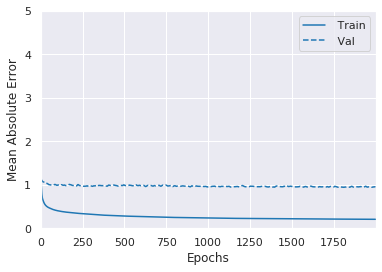

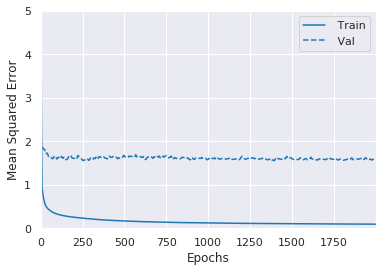

In [27]:
model.show_history()

## Model Validation

9933/1 - 0s - loss: 0.1716 - mae: 0.2315 - mse: 0.1422
Validation loss: 0.2293359331601362
Mean absolute error: 0.23145913
Mean squared error: 0.1421717
Average distance error: 0.37931009729666537


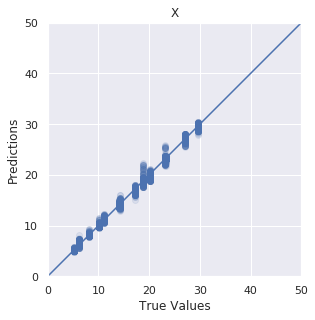

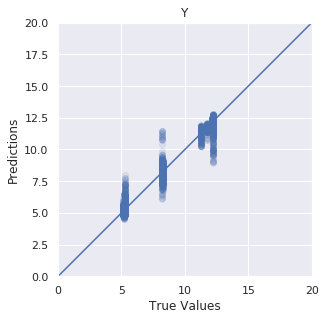

In [28]:
model.model_validation(X_validation, y_validation)

## Model Testing

8458/1 - 0s - loss: 1.6990 - mae: 0.9406 - mse: 1.5669
Test loss: 1.6540277896690774
Mean absolute error: 0.94056386
Mean squared error: 1.5668635
Average distance error: 1.577590766908045


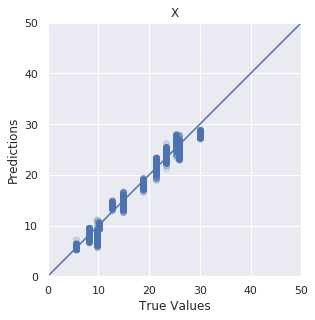

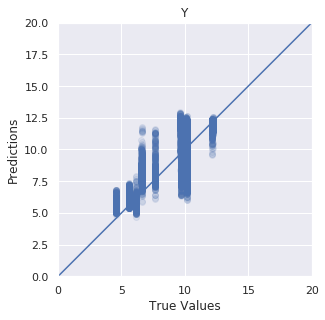

In [29]:
model.model_testing(X_test, y_test)

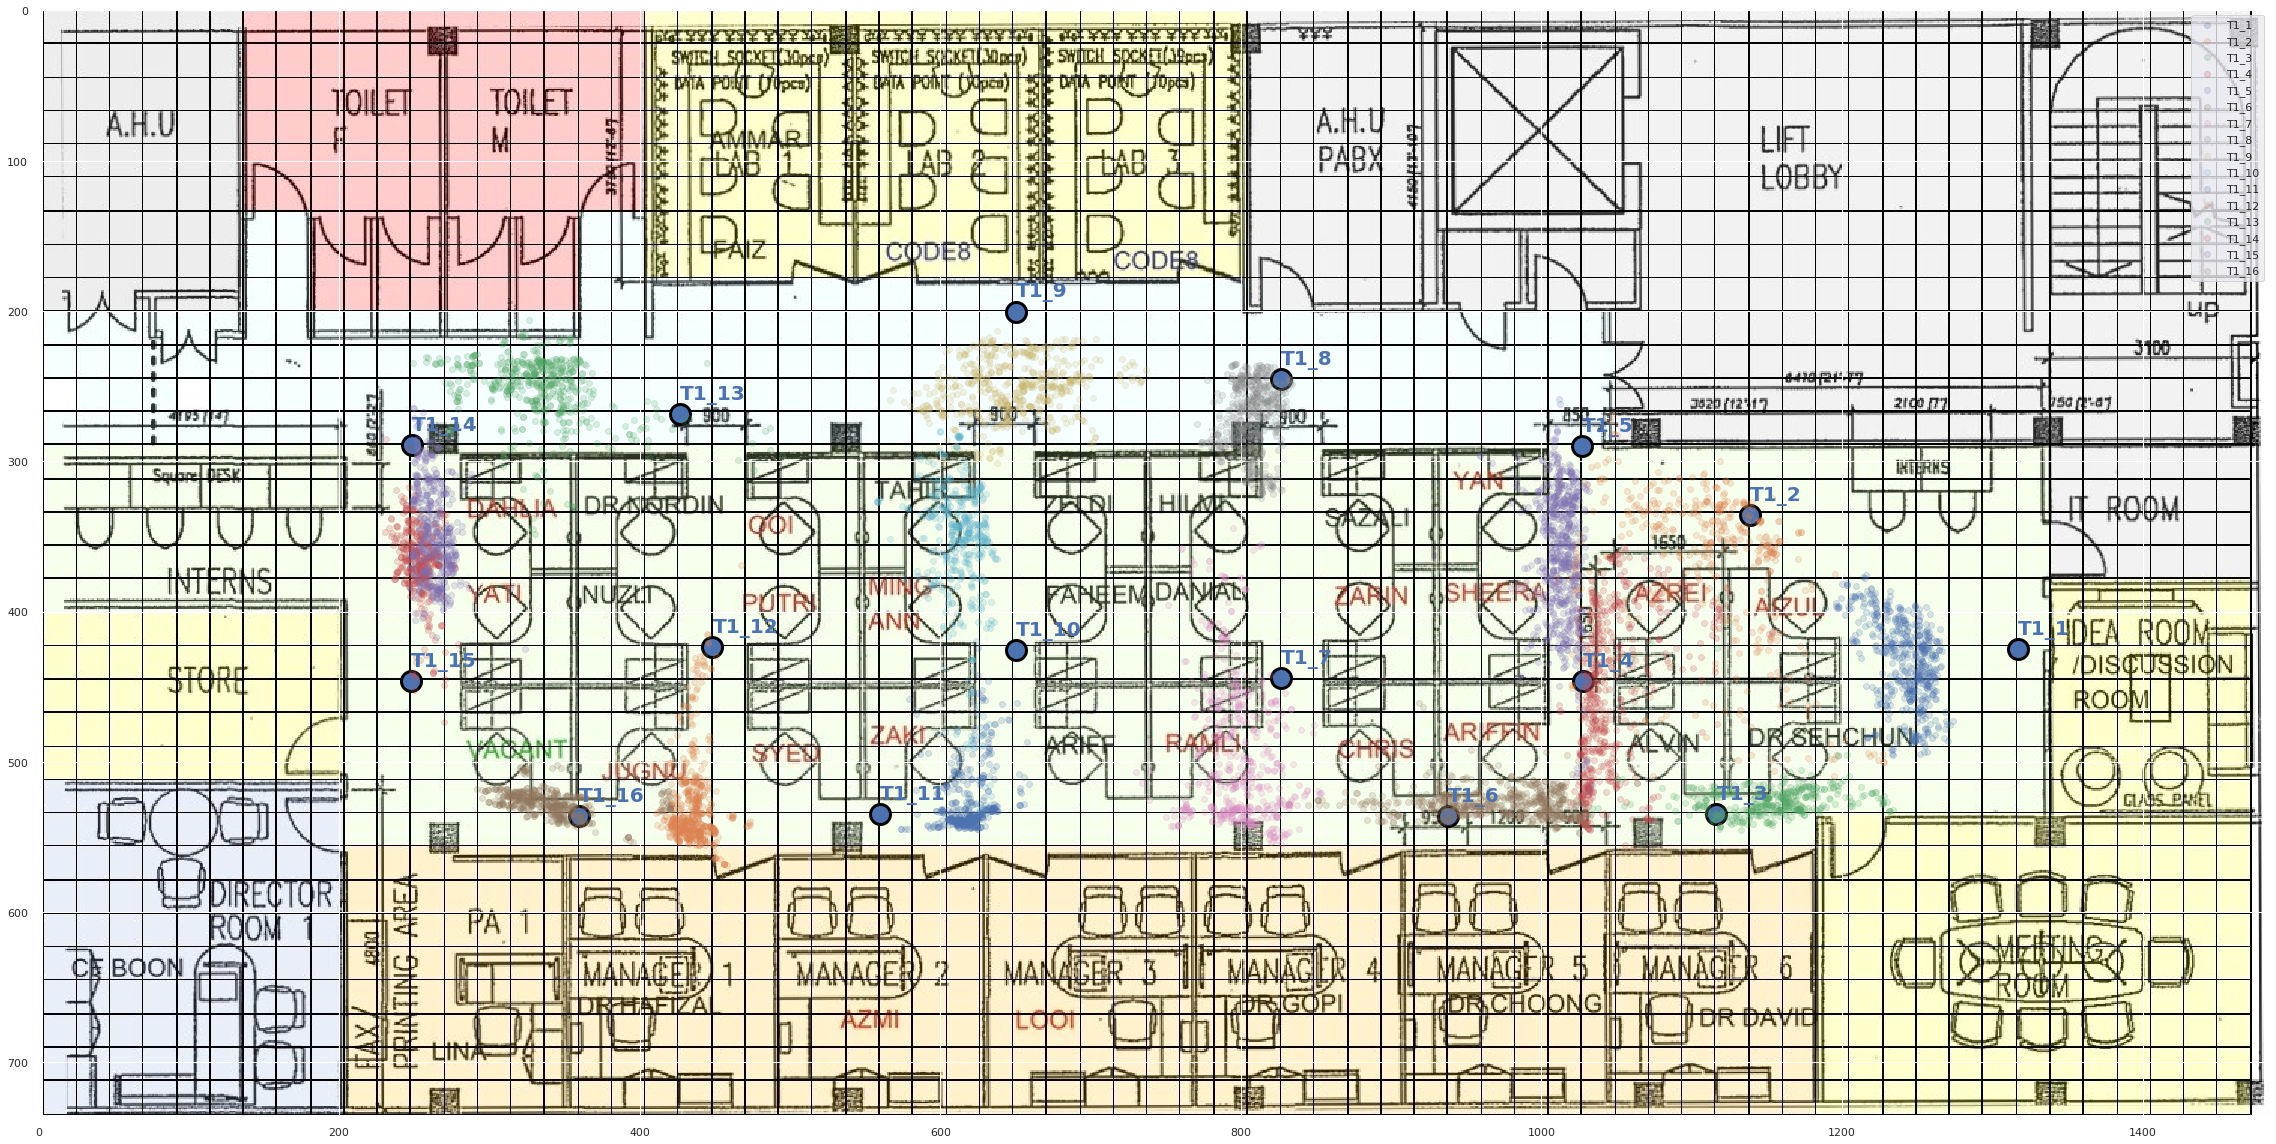

In [30]:
img =  mpimg.imread('../Map/main.png')
fingerprint_color = "r"
testdata_color = "b"
plt.figure(figsize=(40,40))
plt.imshow(img)

labels = ["V1_23", "V1_24", "V1_32", "V1_22", "V1_14", "V1_13", "V1_12", "V1_21", "V1_29", "V1_30", "V1_31", "V1_11", "V1_20", "V1_28", "V1_10", "V1_19", "V1_27", "V1_9", "V1_8", "V1_18", "V1_26"]
x = [27.151600, 29.594400, 29.689400, 23.153700, 23.169100, 20.171700, 17.173201, 18.712299, 18.691700, 23.244200, 27.133301, 14.063600, 14.159800, 14.250300, 11.176600, 10.162500, 10.141900, 8.178670, 5.180690, 6.164600, 6.255650]
y = [8.159480, 8.172020, 11.286000, 8.250140, 5.247920, 5.121330, 5.217130, 8.227330, 12.230300, 12.253700, 11.717700, 5.312350, 8.203950, 12.207500, 5.297530, 8.183420, 12.186400, 5.282130, 5.266730, 8.274090, 12.166400]
x = np.array(x) * 44
y = np.array(y) * 44

testLabels = ["T1_1", "T1_2", "T1_3", "T1_4", "T1_5", "T1_6", "T1_7", "T1_8", "T1_9", "T1_10", "T1_11", "T1_12", "T1_13", "T1_14", "T1_15", "T1_16"]
testX = [29.934250, 25.877805, 25.372470, 23.355726, 23.333564, 21.316819, 18.790348, 18.790348, 14.779021, 14.779021, 12.717952, 10.191480, 9.703916, 5.648265, 5.626103, 8.174736]
testY = [9.659024, 7.630801, 12.155781, 10.139037, 6.593112, 12.177943, 10.094712, 5.573659, 4.554205, 9.673634, 12.155781, 9.629310, 6.105547, 6.570950, 10.139037, 12.177943]
testX = np.array(testX) * 44
testY = np.array(testY) * 44

# plt.scatter(x, y, s=400, c=fingerprint_color, edgecolors="black", linewidths=3)
plt.scatter(testX, testY, s=400, c=testdata_color, edgecolors="black", linewidths=3)

# for i in range(len(labels)):
#     plt.annotate(labels[i], (x[i], y[i] - 10), fontsize=20, color=fingerprint_color, weight='bold')

for j in range(len(testLabels)):
    plt.annotate(testLabels[j], (testX[j], testY[j] - 10), fontsize=20, color=testdata_color, weight='bold')

for i in range(len(testLabels)):
    loc = testLabels[i]
    test_loc = test_rolled[test_rolled['location'] == loc]
    X_loc = test_loc[scanners].values
    locs = model.predict(X_loc) * 44
    plt.scatter(locs[:, 0], locs[:, 1], alpha=0.2, label=testLabels[i])
plt.legend()

In [32]:
model.model.save_weights('../Models/MLP_Regression_Rolling_MinMax_LinearDistanceModel.h5')